## Assignment

一：选择适当的小波函数，展示基于小波变换的图像去噪。

+ **超声**图像上叠加噪声（如散斑噪声）然后去除，并比较去除后与原图像之间的定量化差别。

+ [参考论文](http://inside.mines.edu/~whoff/courses/EENG510/lectures/24-Wavelets.pdf)，了解小波变换是否适合超声图像的去噪。

二：选择适当的小波函数，把自己ps进一个场景或者某人旁边。

## Task 1: Wavelet Denoise

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (9.0, 6.0)
plt.rcParams['image.cmap']='gray'

### Display ultrasound image

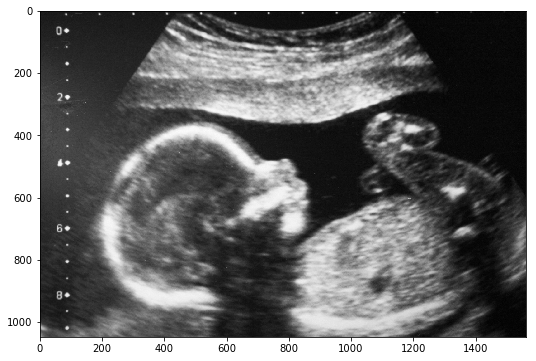

In [2]:
from skimage import color
from skimage import io

us = io.imread('fetal.jpg', as_grey=True)
plt.imshow(us);

### Add `speckle` noise

In [3]:
from skimage.util import random_noise

def easy_show(before, after, diff, title_1, title_2, title_3):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 3, 1); plt.imshow(before)
    plt.title(title_1); plt.axis('off')
    plt.subplot(1, 3, 2); plt.imshow(after)
    plt.title(title_2); plt.axis('off')
    plt.subplot(1, 3, 3); plt.imshow(diff)
    plt.title(title_3); plt.axis('off')
    
    
def easy_compare(lhs, rhs):
    print('sum:  ', np.sum(lhs - rhs))
    print('std:  ', np.std(lhs - rhs))
    print('mean: ', np.mean(lhs - rhs))

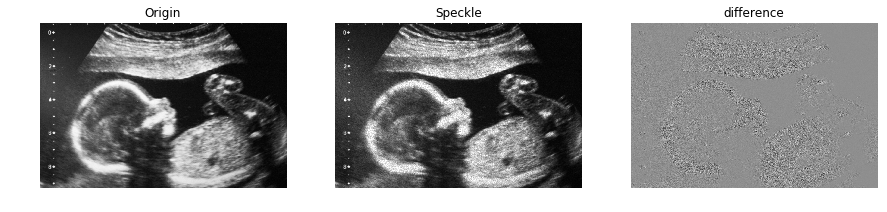

In [4]:
us_speckle = random_noise(us, mode='speckle')
easy_show(us, us_speckle, us_speckle - us, 'Origin', 'Speckle', 'difference')

In [5]:
easy_compare(us_speckle, us)

sum:   -394.127069811
std:   0.0405154544292
mean:  -0.000240919569695


### Select proper `wavelet` fucntion

In [6]:
import pywt
from skimage.restoration import denoise_wavelet

# wavelet names of discrete wavelets
discrete_wavelet = pywt.wavelist(kind='discrete')
print(np.array(discrete_wavelet))

['bior1.1' 'bior1.3' 'bior1.5' 'bior2.2' 'bior2.4' 'bior2.6' 'bior2.8'
 'bior3.1' 'bior3.3' 'bior3.5' 'bior3.7' 'bior3.9' 'bior4.4' 'bior5.5'
 'bior6.8' 'coif1' 'coif2' 'coif3' 'coif4' 'coif5' 'coif6' 'coif7' 'coif8'
 'coif9' 'coif10' 'coif11' 'coif12' 'coif13' 'coif14' 'coif15' 'coif16'
 'coif17' 'db1' 'db2' 'db3' 'db4' 'db5' 'db6' 'db7' 'db8' 'db9' 'db10'
 'db11' 'db12' 'db13' 'db14' 'db15' 'db16' 'db17' 'db18' 'db19' 'db20'
 'db21' 'db22' 'db23' 'db24' 'db25' 'db26' 'db27' 'db28' 'db29' 'db30'
 'db31' 'db32' 'db33' 'db34' 'db35' 'db36' 'db37' 'db38' 'dmey' 'haar'
 'rbio1.1' 'rbio1.3' 'rbio1.5' 'rbio2.2' 'rbio2.4' 'rbio2.6' 'rbio2.8'
 'rbio3.1' 'rbio3.3' 'rbio3.5' 'rbio3.7' 'rbio3.9' 'rbio4.4' 'rbio5.5'
 'rbio6.8' 'sym2' 'sym3' 'sym4' 'sym5' 'sym6' 'sym7' 'sym8' 'sym9' 'sym10'
 'sym11' 'sym12' 'sym13' 'sym14' 'sym15' 'sym16' 'sym17' 'sym18' 'sym19'
 'sym20']


In [7]:
denoise_set = {dw: np.sum(denoise_wavelet(us_speckle, wavelet=dw) - us) for dw in discrete_wavelet}
[print('%-8s: %7.4f' % (k, v)) for i, (k, v) in enumerate(denoise_set.items()) if i < 5];

db36    : -397.2483
rbio3.3 : -401.0903
db24    : -396.8563
db9     : -395.7576
coif16  : -396.6915


In [8]:
# Solution 1
# -------------------------------------------------------------
# sorted(denoise_set.items(), key=lambda d: d[1], reverse=True)
# -------------------------------------------------------------

# Solution 2
# -------------------------------------------------------------
# sorted(zip(denoise_set.values(),d.keys()))[0]
# -------------------------------------------------------------

best_wavelet = min(zip(denoise_set.values(),denoise_set.keys()))
print('*%s* has the minimal difference, and the value is: %g' % (best_wavelet[1], best_wavelet[0]))

*rbio3.1* has the minimal difference, and the value is: -441.192


### Compare with speckled image

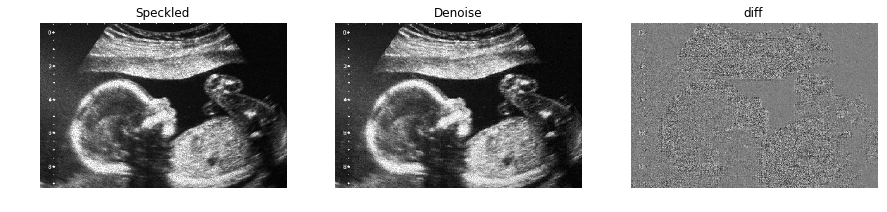

In [9]:
us_denoise = denoise_wavelet(us_speckle, wavelet=best_wavelet[1])
easy_show(us_speckle, us_denoise, us_denoise - us_speckle, 'Speckled', 'Denoise', 'diff')

In [10]:
easy_compare(us_denoise, us_speckle)

sum:   -47.0648042184
std:   0.0419912088449
mean:  -2.8769483876e-05


### Denoise from origin image

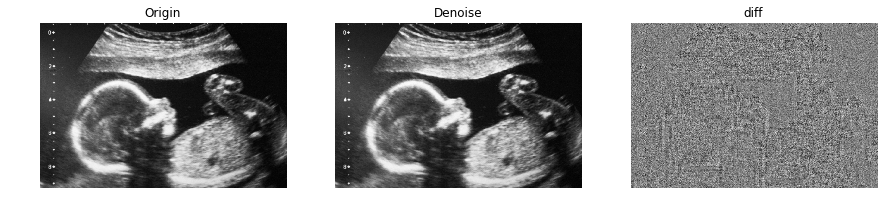

In [11]:
us_denoise = denoise_wavelet(us, wavelet=best_wavelet[1])
easy_show(us, us_denoise, us_denoise - us, 'Origin', 'Denoise', 'diff')

In [12]:
easy_compare(us_denoise, us)

sum:   0.165200871736
std:   0.00667933215429
mean:  1.00982972194e-07


### Discussion

+ It seems **useful** for removing speckle noise, although it is difficult to tell differences with human eyes.
+ Ultrasound images are generally affected by **multiplicative** speckle noise, which is mainly due to the coherent nature of the scattering phenomenon

## Task 2: Images Fusion

### Preprocess

In [13]:
from skimage.color import rgb2gray

my = rgb2gray(io.imread('myself.jpg')[400: 1200, 260: ,])  # choose a region
scene = rgb2gray(io.imread('starry_night.jpg'))

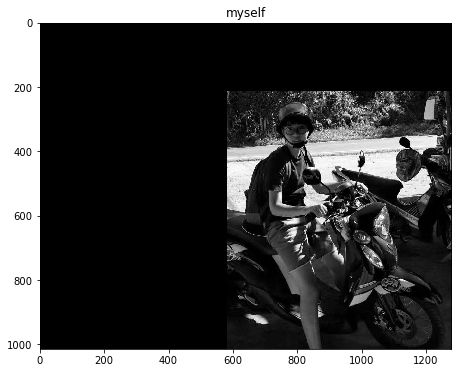

In [14]:
my_pad = np.pad(my, ((scene.shape[0] - my.shape[0], 0), (scene.shape[1] - my.shape[1], 0)), mode='constant')
plt.imshow(my_pad);plt.title('myself');

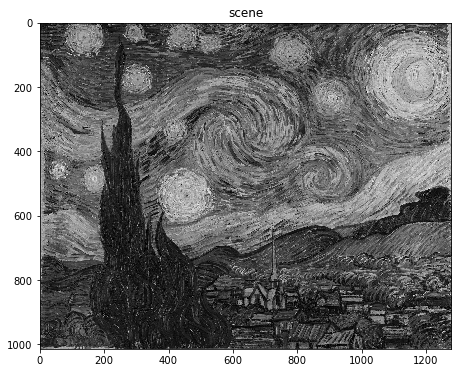

In [15]:
plt.imshow(scene);plt.title('scene');

### Do wavelet transform on each image

In [16]:
# Multilevel n-D Discrete Wavelet Transform

wavelet = 'db1'
coef_1 = pywt.wavedecn(my_pad, wavelet)
coef_2 = pywt.wavedecn(scene, wavelet)

### Fusion in each level 

In [17]:
def fuse(a, b):
    return (a + b) / 2

# initialize
fused_coef = coef_1.copy()

for i in range(len(coef_1) - 1):
    if i == 0:
        fused_coef[0] = fuse(coef_1[i], coef_2[i])
    else:
        for k in coef_1[i].keys():
            fused_coef[i][k] = fuse(coef_1[i][k], coef_2[i][k])

### Reconstruct the image

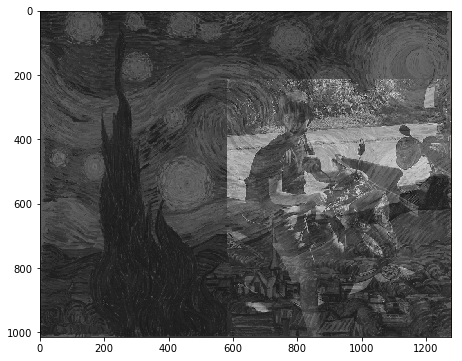

In [18]:
fused = pywt.waverecn(fused_coef, wavelet)
plt.imshow(fused);

## Neural Style

An [implementation](https://github.com/anishathalye/neural-style) of [neural style](https://arxiv.org/pdf/1508.06576v2.pdf) in TensorFlow.

```bash
python neural_style.py --content myself.jpg --styles starry_night.jpg --output fusion.jpg
```

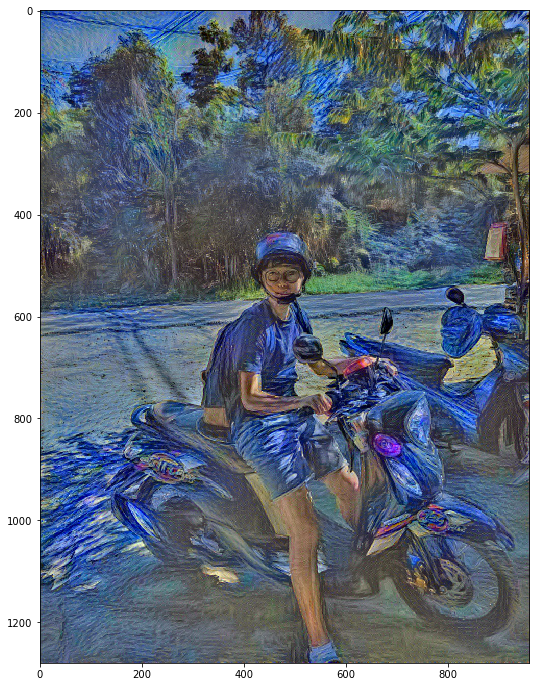

In [19]:
fusion = io.imread('fusion.jpg')
plt.figure(figsize=(9, 12))
plt.imshow(fusion);